In [1]:
# Import necessary dependencies
import cv2
import numpy as np
import unittest
import sys
import os
import matplotlib.pyplot as plt

# Import the necessary classes
from detectors import YOLODetector

from segmentors import YoloSegmentor

from removers import BlurringRemover
from removers import OpenCvInpaintingRemover
from removers import LamaInpaintingRemover
from removers import BetterLamaInpaintingRemover


from benard_supressor import BenardSupressor

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarnin

In [9]:
%matplotlib inline

In [3]:
# Let's import the test data

# 1. Load the test images
test_image1 = cv2.imread('_test_data/test1.jpg') 
test_image2 = cv2.imread('_test_data/test2.jpg')
test_image3 = cv2.imread('_test_data/test3.jpg')
test_image4 = cv2.imread('_test_data/test4.jpg')

images = [test_image1, test_image2, test_image3, test_image4]

In [4]:
# Let's test the perfomance of a Benard Supressor on the test images

detector = YOLODetector()
segmentor = YoloSegmentor()
remover = BetterLamaInpaintingRemover()

benard_supressor = BenardSupressor(detector, segmentor, remover)

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


2024-11-08 12:33:18,379 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
2024-11-08 12:33:19,232 - modelscope - INFO - initiate model from /users/eleves-b/2022/mathias.perez/.cache/modelscope/hub/damo/cv_fft_inpainting_lama
2024-11-08 12:33:19,232 - modelscope - INFO - initiate model from location /users/eleves-b/2022/mathias.perez/.cache/modelscope/hub/damo/cv_fft_inpainting_lama.
2024-11-08 12:33:19,234 - modelscope - INFO - initialize model from /users/eleves-b/2022/mathias.perez/.cache/modelscope/hub/damo/cv_fft_inpainting_lama
2024-11-08 12:33:19,240 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_o

Loading weights for net_encoder


2024-11-08 12:33:19,928 - modelscope - WARNING - No preprocessor field found in cfg.
2024-11-08 12:33:19,928 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2024-11-08 12:33:19,928 - modelscope - WARNING - Cannot find available config to build preprocessor at mode inference, current config: {'model_dir': '/users/eleves-b/2022/mathias.perez/.cache/modelscope/hub/damo/cv_fft_inpainting_lama'}. trying to build by task and model information.
2024-11-08 12:33:19,929 - modelscope - WARNING - No preprocessor key ('FFTInpainting', 'image-inpainting') found in PREPROCESSOR_MAP, skip building preprocessor.
2024-11-08 12:33:19,930 - modelscope - INFO - loading model from dir /users/eleves-b/2022/mathias.perez/.cache/modelscope/hub/damo/cv_fft_inpainting_lama
2024-11-08 12:33:19,930 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_only is True
2024-11-08 12:33:20,135 - modelscope - INFO - BaseInpaintingTrainingModule 

In [5]:
# Let's test the performances of the different parts of the Benard Supressor sequentially

# 1. Test the performance of the Detector
box1 = detector.detect(test_image1)
box2 = detector.detect(test_image2)
box3 = detector.detect(test_image3)
box4 = detector.detect(test_image4)

boxed_image1 = test_image1.copy()
for box in box1: # box is a list of 4 elements : x1, y1, w, h
    x, y, w, h = box
    cv2.rectangle(boxed_image1, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image2 = test_image2.copy()
for box in box2:
    x, y, w, h = box
    cv2.rectangle(boxed_image2, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image3 = test_image3.copy()
for box in box3:
    x, y, w, h = box
    cv2.rectangle(boxed_image3, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image4 = test_image4.copy()
for box in box4:
    x, y, w, h = box
    cv2.rectangle(boxed_image4, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(boxed_image1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(cv2.cvtColor(boxed_image2, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(cv2.cvtColor(boxed_image3, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(cv2.cvtColor(boxed_image4, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()

/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Will run on cpu
Fusing layers... 
Workflow Untitled run successfully in 413.021947 ms.
Workflow Untitled run successfully in 244.107307 ms.
Workflow Untitled run successfully in 240.456597 ms.
Workflow Untitled run successfully in 240.370292 ms.


In [6]:
# 1. Test the performance of the Segmentor
mask1 = segmentor.segment(test_image1, box1)
mask2 = segmentor.segment(test_image2, box2)
mask3 = segmentor.segment(test_image3, box3)
mask4 = segmentor.segment(test_image4, box4)

# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(mask1, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(mask2, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(mask3, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(mask4, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()


0: 640x640 1 person, 180.9ms
Speed: 1.7ms preprocess, 180.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 422.945299 ms.

0: 640x640 2 persons, 1 cup, 171.3ms
Speed: 0.9ms preprocess, 171.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 408.078655 ms.

0: 640x640 3 persons, 1 chair, 167.1ms
Speed: 0.9ms preprocess, 167.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 524.690259 ms.

0: 640x640 1 person, 181.2ms
Speed: 0.9ms preprocess, 181.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 417.069599 ms.


In [7]:
processed_image1 = benard_supressor.process_image(test_image1)
processed_image2 = benard_supressor.process_image(test_image2)
processed_image3 = benard_supressor.process_image(test_image3)
processed_image4 = benard_supressor.process_image(test_image4)

Workflow Untitled run successfully in 256.295978 ms.

0: 640x640 1 person, 162.6ms
Speed: 0.8ms preprocess, 162.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 381.751024 ms.
Original image too large for refinement! Resizing (1024, 1024) to (948, 948)...


Workflow Untitled run successfully in 247.167662 ms.

0: 640x640 2 persons, 1 cup, 170.8ms
Speed: 0.9ms preprocess, 170.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 399.008372 ms.
Original image too large for refinement! Resizing (1024, 1024) to (948, 948)...


Workflow Untitled run successfully in 240.203632 ms.

0: 640x640 3 persons, 1 chair, 159.9ms
Speed: 1.7ms preprocess, 159.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 407.383229 ms.
Original image too large for refinement! Resizing (1024, 1024) to (948, 948)...


Workflow Untitled run successfully in 256.262696 ms.

0: 640x640 1 person, 161.8ms
Speed: 0.8ms preprocess, 161.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 384.788755 ms.
Original image too large for refinement! Resizing (1024, 1024) to (948, 948)...


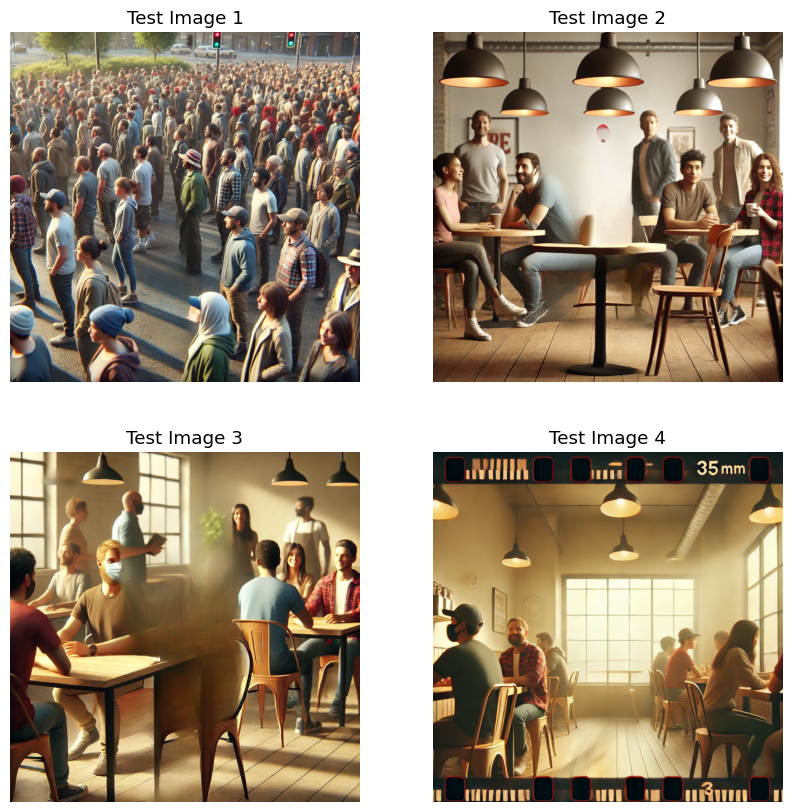

In [11]:
# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(processed_image1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(cv2.cvtColor(processed_image2, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(cv2.cvtColor(processed_image3, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(cv2.cvtColor(processed_image4, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()

